In [43]:
import random

def simple_bandit_algorithm(k, epsilon, bandit, iterations):
    """
    Implementazione dell'algoritmo bandit ε-greedy.

    Args:
        k (int): Numero di azioni possibili.
        epsilon (float): Probabilità di esplorazione.
        bandit (function): Funzione che accetta un'azione e restituisce una ricompensa.
        iterations (int): Numero totale di iterazioni da eseguire.

    Returns:
        tuple: Stime finali di Q, conteggi N, e storia delle ricompense accumulate.
    """
    # Inizializza Q(a) e N(a) per ogni azione
    Q = [0] * k  # Valori stimati per ogni azione
    N = [0] * k  # Conteggi per ogni azione
    rewards = [] # Per tenere traccia delle ricompense accumulate

    for _ in range(iterations):
        # Scelta dell'azione con probabilità ε-greedy
        if random.random() < epsilon:
            A = random.randint(0, k - 1)  # Esplora: scegli un'azione casuale
            # print("EXPLORING action ", A)
        else:
            A = max(range(k), key=lambda x: Q[x])  # Sfrutta: scegli l'azione migliore
            # print("Exploiting action ", A)

        # Ottieni la ricompensa per l'azione selezionata
        R = bandit(A)
        # print("Reward ", R)

        # Aggiorna il conteggio e il valore stimato di Q(A)
        N[A] += 1
        Q[A] += (1 / N[A]) * (R - Q[A])

        # Registra la ricompensa
        rewards.append(R)

    return Q, N, rewards


In [47]:
import numpy as np

# Funzione bandit che simula le ricompense
def bandit(action):
    # Probabilità di ricompensa per ogni braccio
    probabilities = [0.2, 0.5, 0.8]
    return 1 if random.random() < probabilities[action] else 0

# Parametri dell'algoritmo
k = 3  # Numero di bracci
epsilon = 0.3 # Probabilità di esplorazione
iterations = 1000  # Numero di iterazioni

# Esegui l'algoritmo
Q, N, rewards = simple_bandit_algorithm(k, epsilon, bandit, iterations)

# Risultati
print("Valori stimati Q:", Q)
print("Conteggi delle azioni N:", N)
print("Ricompensa totale:", sum(rewards)/iterations)


Valori stimati Q: [0.18627450980392163, 0.4666666666666668, 0.8020565552699225]
Conteggi delle azioni N: [102, 120, 778]
Ricompensa totale: 0.699


In [59]:
def find_best_epsilon(k, bandit, iterations, epsilon_values, num_runs=100):
    """
    Trova il miglior valore di epsilon che massimizza la ricompensa media su più run.

    Args:
        k (int): Numero di azioni possibili.
        bandit (function): Funzione che accetta un'azione e restituisce una ricompensa.
        iterations (int): Numero totale di iterazioni per ogni run.
        epsilon_values (list of float): Lista dei valori di epsilon da testare.
        num_runs (int): Numero di run indipendenti per ogni valore di epsilon.

    Returns:
        float: Il valore ottimale di epsilon.
        dict: Un dizionario con le ricompense medie per ogni epsilon.
    """
    results = {}

    for epsilon in epsilon_values:
        total_rewards = 0  # Ricompensa cumulativa su tutti i run

        for _ in range(num_runs):
            # Esegui il semplice algoritmo bandit per questo run
            _, _, rewards = simple_bandit_algorithm(k, epsilon, bandit, iterations)
            total_rewards += sum(rewards)

        # Calcola la ricompensa media per questo valore di epsilon
        average_reward = total_rewards / (num_runs * iterations)
        results[epsilon] = average_reward
        print(f"Epsilon: {epsilon}, Ricompensa media su {num_runs} run: {average_reward:.4f}")

    # Trova il valore di epsilon che massimizza la ricompensa media
    best_epsilon = max(results, key=results.get)
    return best_epsilon, results

# Esempio di utilizzo
if __name__ == "__main__":
    # Funzione bandit che simula le ricompense
    def bandit(action):
        # probabilities = [0.2, 0.3, 0.5, 0.8, 0.9]  # Probabilità di ricompensa per ogni braccio
        probabilities = [0.2, 0.5, 0.8]
        return 1 if random.random() < probabilities[action] else 0

    # Parametri
    k = 3  # Numero di bracci
    iterations = 1000  # Numero di iterazioni per ogni run
    # epsilon_values = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9]  # Valori di epsilon da testare
    epsilon_values = np.linspace(0.01, 0.9, 50)  # Valori di epsilon da testare
    num_runs = 100  # Numero di run per ciascun epsilon

    # Trova il miglior epsilon
    best_epsilon, results = find_best_epsilon(k, bandit, iterations, epsilon_values, num_runs)

    print("\nMiglior epsilon:", best_epsilon)
    print("Ricompense medie:", results)


Epsilon: 0.01, Ricompensa media su 100 run: 0.6296
Epsilon: 0.028163265306122447, Ricompensa media su 100 run: 0.7233
Epsilon: 0.0463265306122449, Ricompensa media su 100 run: 0.7420
Epsilon: 0.06448979591836734, Ricompensa media su 100 run: 0.7463
Epsilon: 0.08265306122448979, Ricompensa media su 100 run: 0.7495
Epsilon: 0.10081632653061223, Ricompensa media su 100 run: 0.7537
Epsilon: 0.11897959183673469, Ricompensa media su 100 run: 0.7520
Epsilon: 0.13714285714285715, Ricompensa media su 100 run: 0.7451
Epsilon: 0.1553061224489796, Ricompensa media su 100 run: 0.7418
Epsilon: 0.17346938775510204, Ricompensa media su 100 run: 0.7396
Epsilon: 0.19163265306122448, Ricompensa media su 100 run: 0.7321
Epsilon: 0.20979591836734693, Ricompensa media su 100 run: 0.7278
Epsilon: 0.2279591836734694, Ricompensa media su 100 run: 0.7243
Epsilon: 0.24612244897959185, Ricompensa media su 100 run: 0.7213
Epsilon: 0.2642857142857143, Ricompensa media su 100 run: 0.7155
Epsilon: 0.28244897959183674

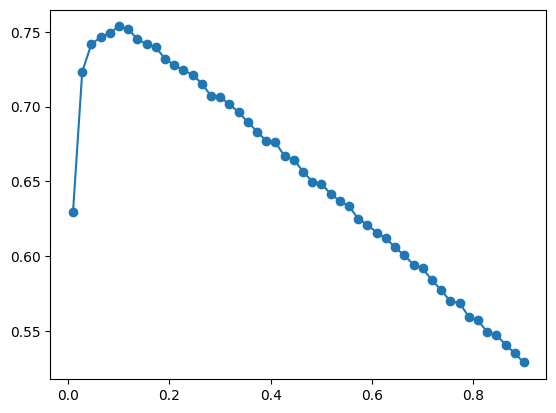

In [60]:
import matplotlib.pyplot as plt
plt.plot(list(results.keys()), list(results.values()), marker='o')

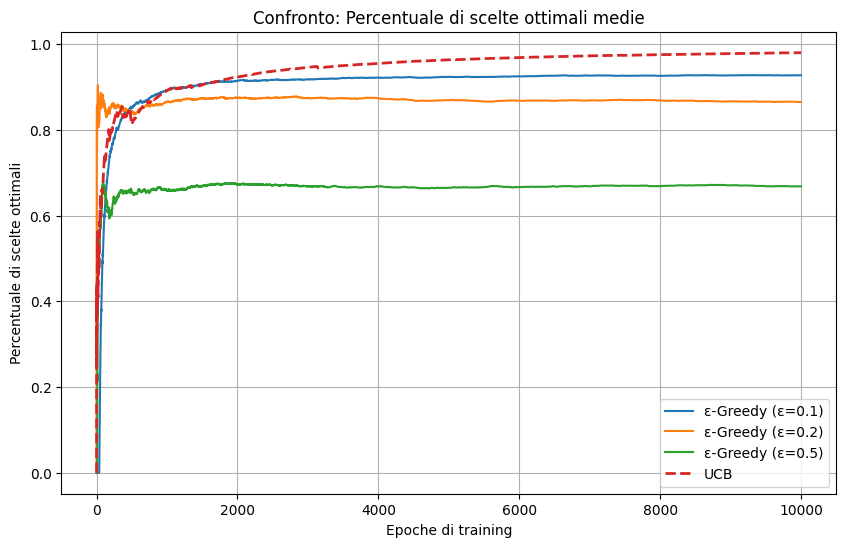

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Funzione bandit che simula le ricompense
def bandit(action):
    probabilities = [0.2, 0.5, 0.8]  # Probabilità di ricompensa per ogni braccio
    return 1 if random.random() < probabilities[action] else 0

# ε-Greedy Algorithm
def epsilon_greedy(k, epsilon, iterations, optimal_action):
    Q = [0] * k  # Valori stimati
    N = [0] * k  # Conteggi per ogni azione
    optimal_choices = []  # Traccia se la scelta è stata ottimale

    for t in range(iterations):
        if random.random() < epsilon:
            A = random.randint(0, k - 1)  # Esplora
        else:
            A = max(range(k), key=lambda x: Q[x])  # Sfrutta

        R = bandit(A)
        N[A] += 1
        Q[A] += (1 / N[A]) * (R - Q[A])  # Aggiornamento incrementale
        optimal_choices.append(1 if A == optimal_action else 0)

    return np.cumsum(optimal_choices) / np.arange(1, iterations + 1)  # Percentuale scelte ottimali

# UCB Algorithm
def upper_confidence_bound(k, iterations, optimal_action):
    Q = [0] * k  # Valori stimati per ogni braccio
    N = [0] * k  # Numero di volte che ogni braccio è stato scelto
    optimal_choices = []  # Traccia se la scelta è stata ottimale

    for t in range(iterations):
        if t < k:
            A = t  # Esplora ogni braccio almeno una volta all'inizio
        else:
            # Seleziona il braccio che massimizza la somma tra:
            # 1. Il valore stimato Q[x] (sfruttamento)
            # 2. Un termine esplorativo che decresce all'aumentare di N[x] 
            #    (numero di volte che il braccio è stato scelto)
            # La formula UCB bilancia esplorazione e sfruttamento:
            # Q[x] + sqrt(2 * log(t + 1) / (N[x] + 1e-9))
            A = max(range(k), key=lambda x: Q[x] + math.sqrt(2 * math.log(t + 1) / (N[x] + 1e-9)))

        R = bandit(A)  # Ricompensa restituita dal braccio selezionato
        N[A] += 1  # Incrementa il conteggio per il braccio scelto
        Q[A] += (1 / N[A]) * (R - Q[A])  # Aggiorna il valore stimato Q[A]
        optimal_choices.append(1 if A == optimal_action else 0)  # Registra se è stata fatta la scelta ottimale

    # Calcola la percentuale cumulativa di scelte ottimali
    return np.cumsum(optimal_choices) / np.arange(1, iterations + 1)


# Confronto delle due strategie
def compare_strategies(k, iterations, epsilon_values):
    plt.figure(figsize=(10, 6))

    # Identifica l'azione ottimale
    probabilities = [0.2, 0.5, 0.8]
    optimal_action = np.argmax(probabilities)

    for epsilon in epsilon_values:
        optimal_choices_epsilon = epsilon_greedy(k, epsilon, iterations, optimal_action)
        plt.plot(optimal_choices_epsilon, label=f"ε-Greedy (ε={epsilon})")

    optimal_choices_ucb = upper_confidence_bound(k, iterations, optimal_action)
    plt.plot(optimal_choices_ucb, label="UCB", linestyle="--", linewidth=2)

    plt.title("Confronto: Percentuale di scelte ottimali medie")
    plt.xlabel("Epoche di training")
    plt.ylabel("Percentuale di scelte ottimali")
    plt.legend()
    plt.grid()
    plt.show()

# Esecuzione
if __name__ == "__main__":
    k = 3  # Numero di bracci
    iterations = 10000  # Numero di iterazioni
    epsilon_values = [0.1, 0.2, 0.5]  # Valori di epsilon da confrontare

    compare_strategies(k, iterations, epsilon_values)
